# EC7212 – Computer Vision and Image Processing - Take Home Assignment 1



## Task

1. **Intensity Level Reduction**
2. **Spatial Averaging**
3. **Image Rotation**:
4. **Resolution Reduction**

## Import Libraries

In [2]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

## Load Image

Let's start by loading an image. You can enter the image path below:

In [3]:
def load_image(image_path):
    image_path = image_path.replace('\\', '/')
    
    print(f"Loading image from: {image_path}")
    imgage = cv2.imread(image_path)
    
    if imgage is None:
        print("Error: Image can not find. Check the file path.")
        return None
    
    print(f"Image loaded successfully with shape: {imgage.shape}")
    return imgage

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\keshan\AppData\Local\Temp\ipykernel_25640\3419695799.py:2: SyntaxWarning: invalid escape sequence '\S'
  image_path = "D:\Semester_07\Computer_Vision_Image_Processing\Assigenmnet\ec7212_assignment_1\parrot.png"  # Replace with your image path


Loading image from: D:/Semester_07/Computer_Vision_Image_Processing/Assigenmnet/ec7212_assignment_1/parrot.png
Image loaded successfully with shape: (853, 1280, 3)


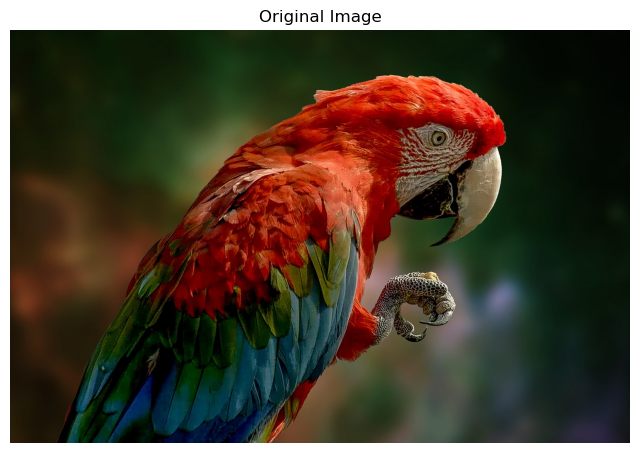

In [ ]:
#Load and Dsiplay The Image
image_path = "D:\Semester_07\Computer_Vision_Image_Processing\Assigenmnet\ec7212_assignment_1\parrot.png" 

image = load_image(image_path)

if image is not None:
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

## Helper Functions

Define Functions for Displaying Images 

In [25]:
def show_images(original, processed, title1="Original", title2="Processed"):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    if len(original.shape) == 3:
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(original, cmap='gray')
    plt.title(title1)
    plt.axis('off')
    
    plt.subplot(122)
    if len(processed.shape) == 3:
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(processed, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## Task 1: Intensity Level Reduction

Reduce the number of intensity levels in a grayscale image from 256 to a specified power of 2.

In [6]:
def reduce_intensity_levels(image, levels):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    factor = 256 // levels

    reduced = (gray // factor) * factor
    
    return gray, reduced

In [26]:
# Test intensity level reduction
@interact(levels=[2, 4, 8, 16, 32, 64, 128])
def show_intensity_reduction(levels):
    if 'image' not in globals() or image is None:
        print("Please load an image first")
        return
    
    original_gray, reduced = reduce_intensity_levels(image, levels)
    show_images(original_gray, reduced, 
                "Original Grayscale (256 levels)", 
                f"Reduced to {levels} levels")
    print(f"Intensity levels reduced from 256 to {levels}")
   

interactive(children=(Dropdown(description='levels', options=(2, 4, 8, 16, 32, 64, 128), value=2), Output()), …

## Task 2: Spatial Averaging

Apply average filtering with different kernel sizes (3×3, 10×10, and 20×20).

In [8]:
def apply_averaging_filter(image, kernel_size):

    blurred = cv2.blur(image, (kernel_size, kernel_size))
    return blurred

In [27]:
def compare_averaging_filters():
    if 'image' not in globals() or image is None:
        print("Please load an image first")
        return
    
    kernel_sizes = [3, 10, 20]
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Show original image
    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')
    
    # Show blurred images
    for i, k_size in enumerate(kernel_sizes):
        row = (i + 1) // 2
        col = (i + 1) % 2
        
        blurred = apply_averaging_filter(image, k_size)
        axes[row, col].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(f"Kernel Size: {k_size}×{k_size}")
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("Spatial averaging replaces each pixel with the average of surrounding pixels")
 

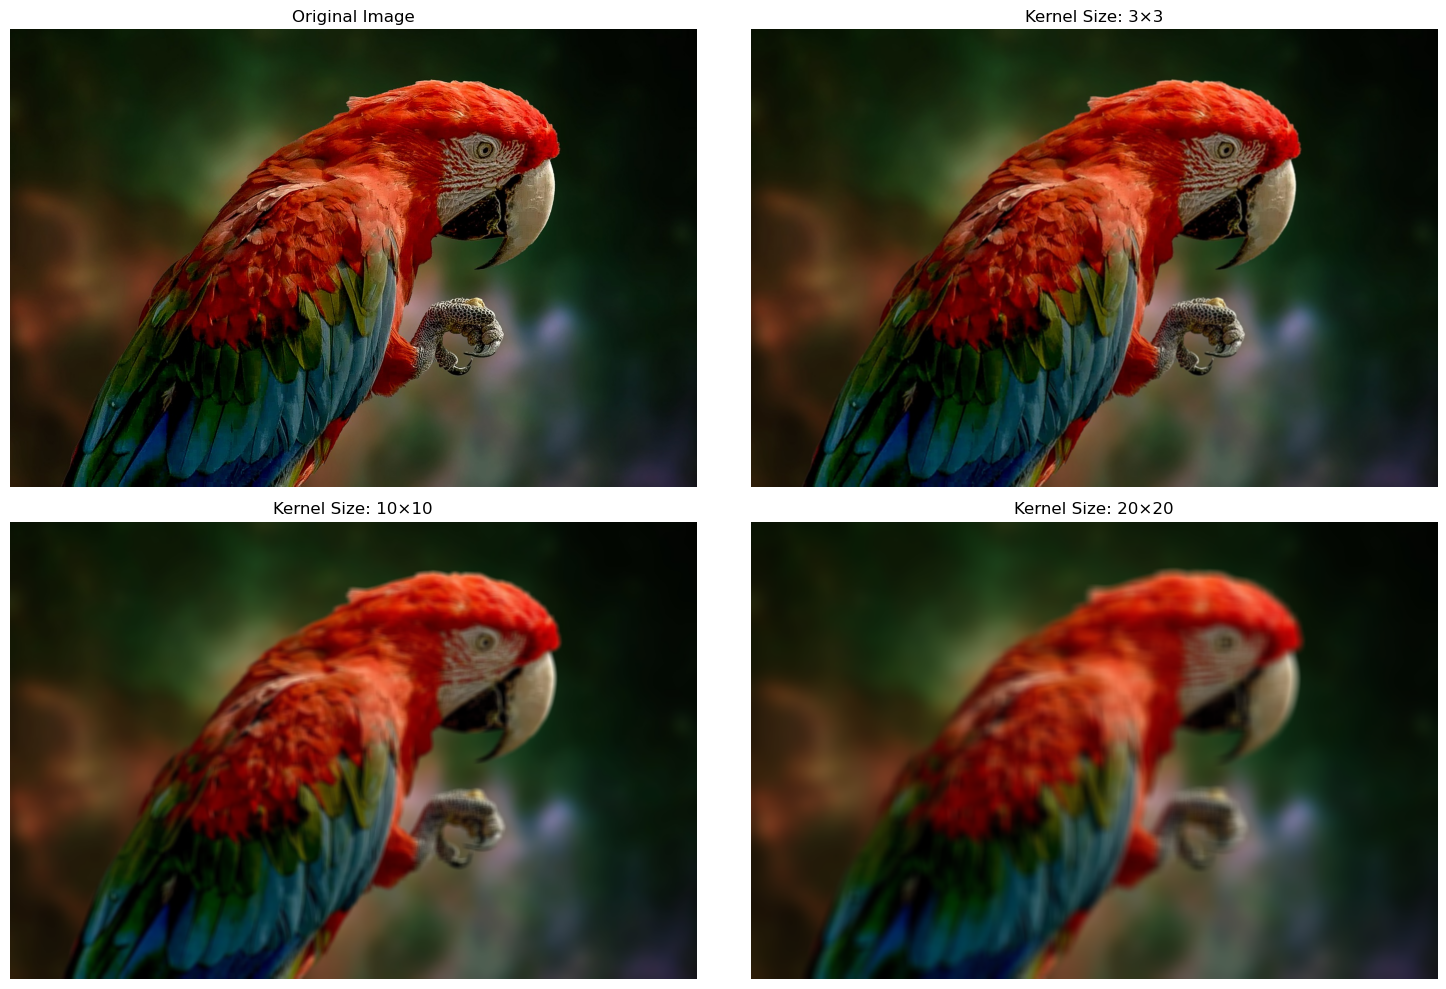

Spatial averaging replaces each pixel with the average of surrounding pixels


In [28]:

compare_averaging_filters()

## Task 3: Image Rotation

Rotate an image by 45° and 90°.

In [11]:
def rotate_image(image, angle):

    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    
    # Create rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Apply rotation
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    return rotated

In [17]:
def show_rotated_images():
    """Display rotated images at 45° and 90°"""
    if 'image' not in globals() or image is None:
        print("Please load an image first")
        return
    
    angles = [45, 90]
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Show original image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    # Show rotated images
    for i, angle in enumerate(angles):
        rotated = rotate_image(image, angle)
        axes[i+1].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
        axes[i+1].set_title(f"Rotated by {angle}°")
        axes[i+1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("Image rotation is performed around the center of the image")
   

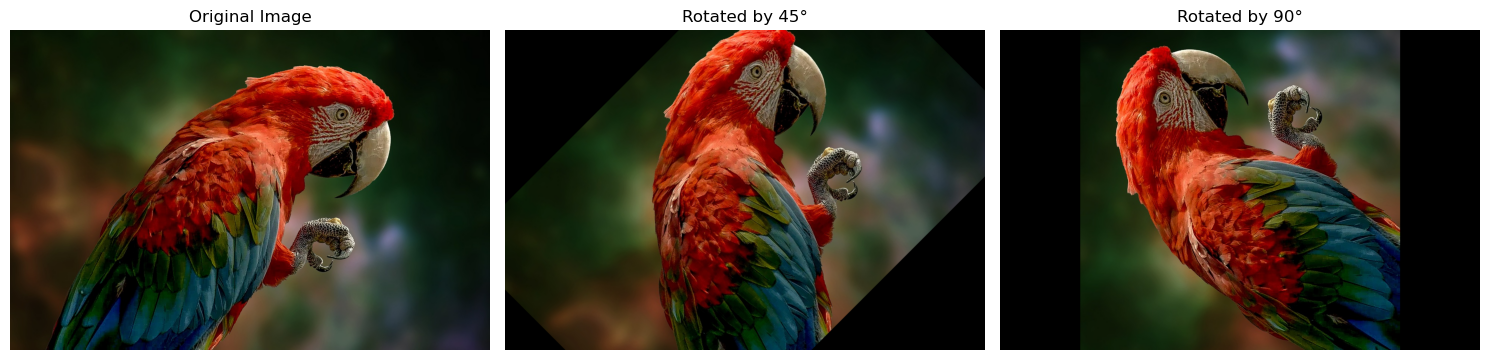

Image rotation is performed around the center of the image


In [18]:

show_rotated_images()

## Task 4: Resolution Reduction (Block Averaging)

Replace each non-overlapping block with its average value for 3×3, 5×5, and 7×7 blocks.

In [19]:
def reduce_resolution(image, block_size):
    # Convert to grayscale if not already
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    height, width = gray.shape
    result = gray.copy()
    
    # Process each block
    for y in range(0, height - block_size + 1, block_size):
        for x in range(0, width - block_size + 1, block_size):
            block = gray[y:y+block_size, x:x+block_size]
            avg_value = np.mean(block)
            
            # Replace all pixels in the block with the average
            result[y:y+block_size, x:x+block_size] = avg_value
    
    return gray, result

In [23]:
def compare_block_averaging():
    if 'image' not in globals() or image is None:
        print("Please load an image first")
        return
    
    block_sizes = [3, 5, 7]
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Show original grayscale image
    original_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    axes[0, 0].imshow(original_gray, cmap='gray')
    axes[0, 0].set_title("Original Grayscale Image")
    axes[0, 0].axis('off')
    
    # Show reduced resolution images
    for i, block_size in enumerate(block_sizes):
        row = (i + 1) // 2
        col = (i + 1) % 2
        
        _, reduced = reduce_resolution(image, block_size)
        axes[row, col].imshow(reduced, cmap='gray')
        axes[row, col].set_title(f"Block Size: {block_size}×{block_size}")
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("Resolution reduction replaces each block with its average value")


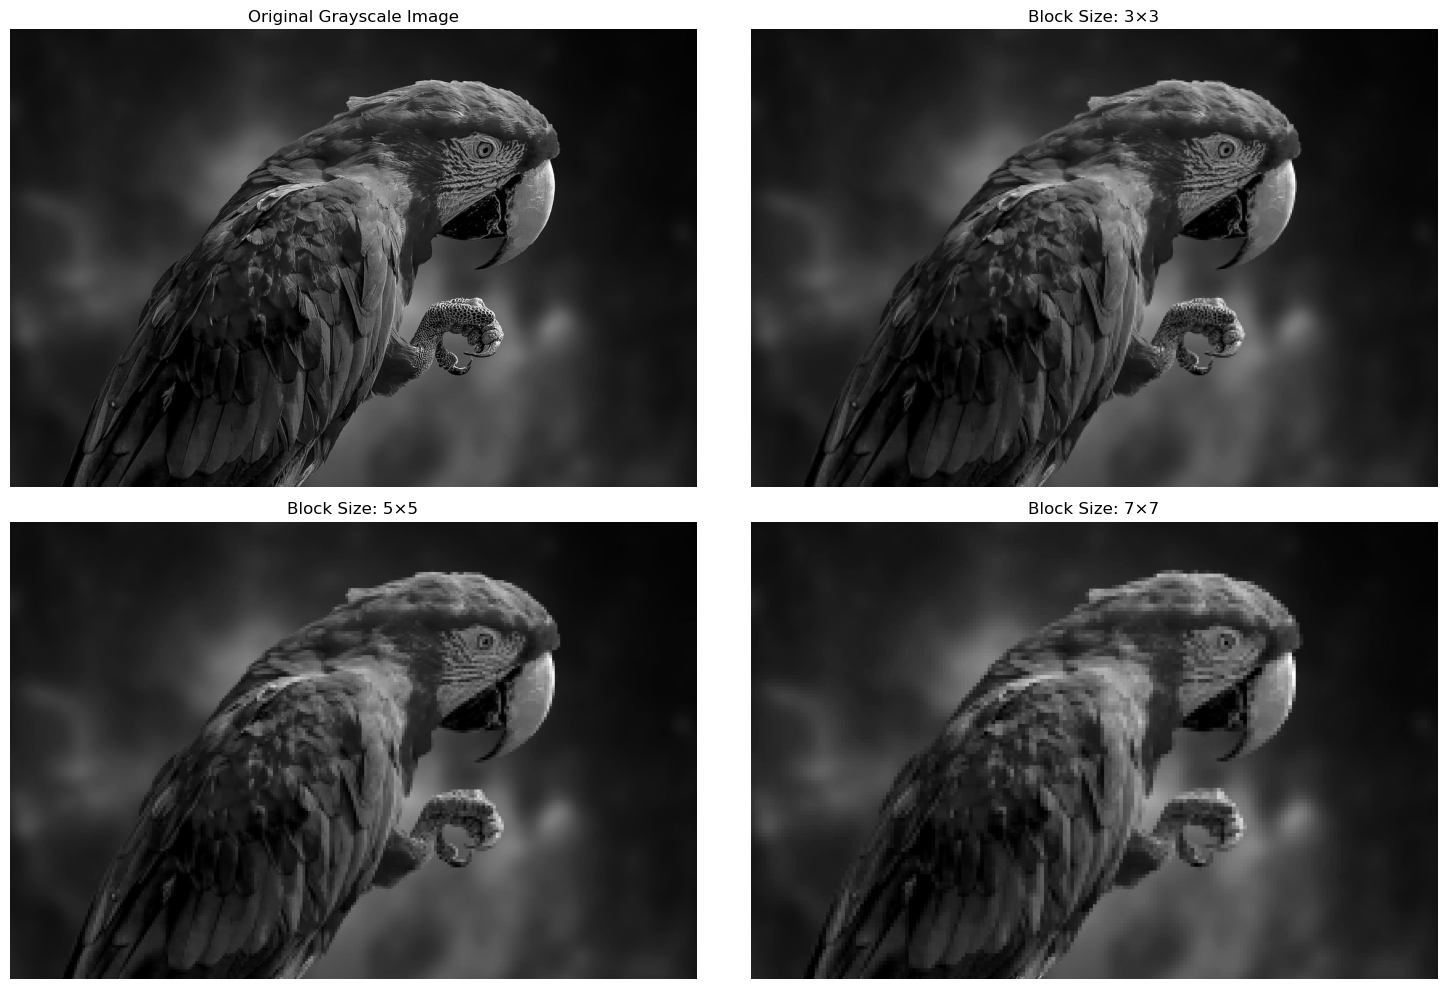

Resolution reduction replaces each block with its average value


In [24]:

compare_block_averaging()